In [6]:
import os
import zipfile

In [13]:
os.listdir('./base_total')

['test', 'train']

In [8]:
import matplotlib.pylab as plt
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers

2022-03-23 12:10:06.210064: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [14]:
# 기본 경로
base_dir = './base_total'
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'

In [15]:
import time, random, datetime
import numpy as np
import tensorflow as tf

In [16]:
import matplotlib.pylab as plt

import tensorflow as tf

In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                 rotation_range = 40,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 shear_range=0.2,
                                                                 zoom_range=0.2)

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = train_generator.flow_from_directory(train_dir,batch_size=32, target_size=(224, 224))
# train_data = image_generator.flow_from_directory(train_dir,batch_size=32, target_size=(224, 224))
test_data = image_generator.flow_from_directory(test_dir,batch_size=32, target_size=(224, 224))

Found 5979 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [18]:
for train_batch, label_batch in train_data:
  print("Image batch shape: ", train_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break


Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)


In [19]:
for test_batch, label_batch in test_data:
  print("Image batch shape: ", test_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 3)


In [20]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [21]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

2022-03-23 12:44:52.933758: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-23 12:44:52.934998: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-23 12:44:52.977207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 12:44:52.979029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-03-23 12:44:52.979056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-23 12:44:52.980923: I tensorflow/stream_executor/platform/defau

In [22]:
feature_batch = feature_extractor_layer(train_batch)
print(feature_batch.shape)

2022-03-23 12:44:58.613591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-23 12:44:58.638399: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2992965000 Hz
2022-03-23 12:44:58.851471: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-03-23 12:45:00.337501: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


(32, 1280)


In [23]:
feature_extractor_layer.trainable = False

In [24]:
with tf.device("/gpu:0"):
    model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(train_data.num_classes, activation='softmax')
    ])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc',
          tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')])

In [27]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-03-23 12:45:12.592489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-23 12:45:12.592832: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Tesla V100S-PCIE-32GB computeCapability: 7.0
coreClock: 1.597GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 1.03TiB/s
2022-03-23 12:45:12.592880: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-23 12:45:12.592906: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-03-23 12:45:12.592913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-03-23 12:45:12.592921: I tensorflow/stream_executor/p

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11923327532854437206,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 31589217152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14079714312639032009
 physical_device_desc: "device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:03:00.0, compute capability: 7.0"]

In [28]:
import time, random, datetime
import numpy as np
import tensorflow as tf
class DataLoader(tf.keras.utils.Sequence):
    def __len__(self):
        return 10
    def __getitem__(self, i):
        time.sleep(random.randint(1,2))
        #you could add a print here to see that it's out of order
        return i

In [29]:
steps_per_epoch = np.ceil(train_data.samples/train_data.batch_size)
steps_test_per_epoch = np.ceil(test_data.samples/test_data.batch_size)

In [30]:
history = model.fit(train_data,
                    validation_data=test_data,
                    steps_per_epoch=steps_per_epoch,
                    epochs=15,
                    validation_steps=steps_test_per_epoch,
                    verbose=2)


Epoch 1/15
187/187 - 835s - loss: 0.8901 - acc: 0.5964 - precision: 0.6802 - recall: 0.4568 - val_loss: 0.7634 - val_acc: 0.7125 - val_precision: 0.7754 - val_recall: 0.6042
Epoch 2/15
187/187 - 820s - loss: 0.6121 - acc: 0.7642 - precision: 0.8184 - recall: 0.6770 - val_loss: 0.6361 - val_acc: 0.7833 - val_precision: 0.8177 - val_recall: 0.6917
Epoch 3/15
187/187 - 815s - loss: 0.5282 - acc: 0.7913 - precision: 0.8307 - recall: 0.7314 - val_loss: 0.5716 - val_acc: 0.7958 - val_precision: 0.8381 - val_recall: 0.7333
Epoch 4/15
187/187 - 817s - loss: 0.4858 - acc: 0.8127 - precision: 0.8480 - recall: 0.7679 - val_loss: 0.5250 - val_acc: 0.7875 - val_precision: 0.8318 - val_recall: 0.7417
Epoch 5/15
187/187 - 821s - loss: 0.4381 - acc: 0.8389 - precision: 0.8700 - recall: 0.7933 - val_loss: 0.5332 - val_acc: 0.7958 - val_precision: 0.8133 - val_recall: 0.7625
Epoch 6/15
187/187 - 826s - loss: 0.4232 - acc: 0.8386 - precision: 0.8698 - recall: 0.8046 - val_loss: 0.5225 - val_acc: 0.7958 -

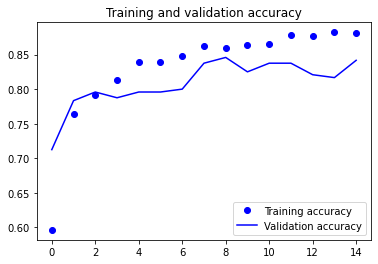

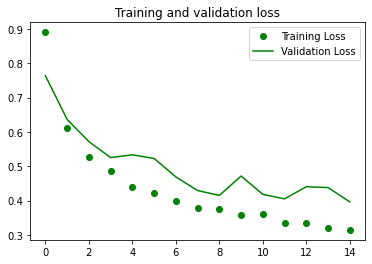

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
import time
t = time.time()

export_path = "MobileNet total v4"
model.save(export_path, save_format='tf')
model.save(export_path)

export_path

2022-03-23 16:37:09.873787: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: MobileNet total v4/assets


INFO:tensorflow:Assets written to: MobileNet total v4/assets


INFO:tensorflow:Assets written to: MobileNet total v4/assets


INFO:tensorflow:Assets written to: MobileNet total v4/assets


'MobileNet total v4'

In [32]:
class_names = sorted(test_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Bodyhit', 'Midblock', 'Topblock'], dtype='<U8')

In [33]:
predicted_batch = model.predict(test_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [40]:
label_id = np.argmax(label_batch, axis=-1)

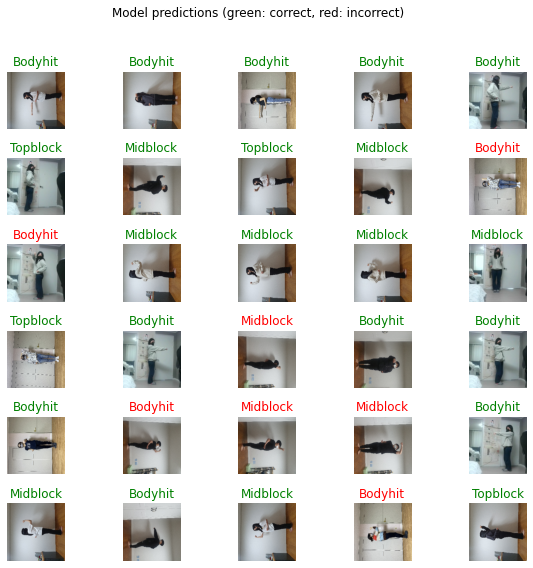

In [41]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(test_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [52]:
class_names

array(['Bodyhit', 'Midblock', 'Topblock'], dtype='<U8')

In [80]:
path='./2.PNG'
img=image.load_img(path, target_size=(224, 224))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=32)

print(classes)

[[0.10649943 0.11844391 0.77505666]]


In [71]:
reloaded = tf.keras.models.load_model('./black-belt/AImodel/base_TL_V4/MobileNet V2_v4')

In [72]:
classesS = reloaded.predict(images, batch_size=32)
print(classesS)

[[6.7712574e-07 5.5990538e-05 5.9411166e-05 8.0845052e-01 8.2637900e-03
  1.8316960e-01]]


In [73]:
pre_id = np.argmax(classesS, axis=-1)

In [74]:
print(pre_id)

[3]
